# Name- Abhinav Kumar

# PRN- 21070126006

# Branch- AIML_A1

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('bdiag.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data[['texture_mean', 'radius_mean']]
y = data['diagnosis']

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
# Lets map each B to 0 and each M to 1
def map_(x):
    if x == "B":
        return 0
    else:
        return 1

y = y.map(map_)

In [7]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   texture_mean  569 non-null    float64
 1   radius_mean   569 non-null    float64
dtypes: float64(2)
memory usage: 9.0 KB


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

a. Use a KNN with k=5 to predict Diagnosis using texture_mean and
radius_mean.

In [10]:
# Train the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

b. Build the confusion matrix for the classification above

Text(0.5, 1.0, 'confusion matrix')

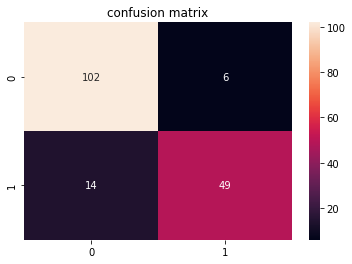

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt=".0f")
plt.title("confusion matrix")


c. Plot the scatter plot for texture_mean and radius_mean and draw the border
line for the prediction of Diagnosis based on the model in a)

In [12]:
x_min, x_max = X['texture_mean'].min() - 1, X['texture_mean'].max() + 1
y_min, y_max = X['radius_mean'].min() - 1, X['radius_mean'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)

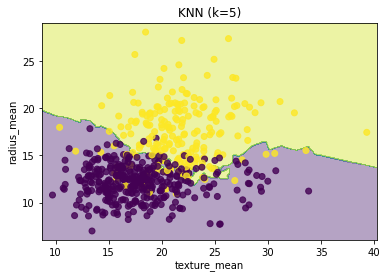

In [13]:
# Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based on the model with k=5
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['texture_mean'], X['radius_mean'], c=y, alpha=0.8)
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')
plt.title('KNN (k=5)')
plt.show()

d. Plot the scatter plot for texture_mean and radius_mean and draw the border
line for the prediction of Diagnosis based knn, k=15

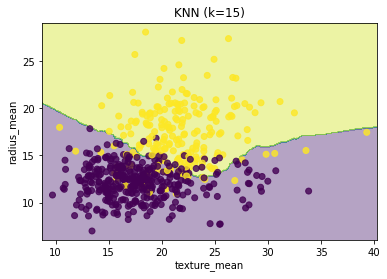

In [18]:
# Train the KNN model with k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

# Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based knn, k=15
Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['texture_mean'], X['radius_mean'], c=y, alpha=0.8)
plt.xlabel('texture_mean')
plt.ylabel('radius_mean')
plt.title('KNN (k=15)')
plt.show()